In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=200)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [3]:
model.fit(X_train, y_train)# Train the model
y_pred = model.predict(X_test)# Make predictions
accuracy = accuracy_score(y_test, y_pred)# Evaluate the model
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


coefficients: [-0.39349364  0.96246717 -2.3751418  -0.99874814]


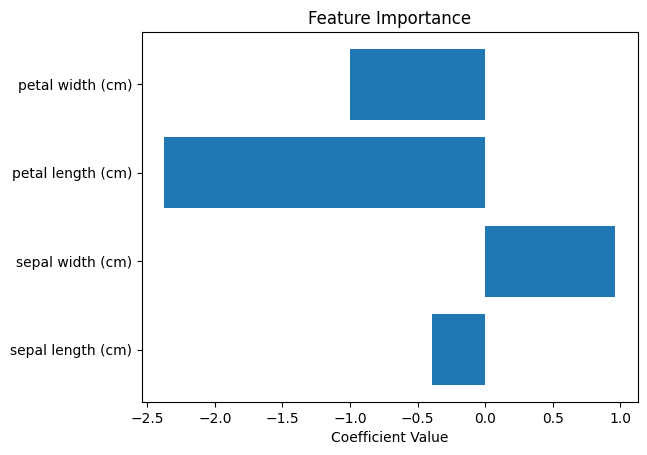

In [ ]:
# you can see the weightage assigned to each feature

# this weightage helps in understanding the importance of each feature in making predictions
# For example, 
# higher absolute values indicate more influence on the prediction
# while values close to zero suggest less influence.

# lets plot the weightage assigned to each feature
import matplotlib.pyplot as plt
features = iris.feature_names
coefficients = model.coef_[0]
print("coefficients:", coefficients)
plt.barh(features, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance")
plt.show()


# of weights value is in huge negative or positive then 
# it means that feature is very important for the model

# if the weightage is close to zero then that feature 
# is not important for the model

In [9]:
#https://developers.google.com/machine-learning/crash-course/logistic-regression/sigmoid-function

In [8]:
# 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lambda_values = [0.01, 0.1, 1, 10, 100]
import numpy as np
for lambda_val in lambda_values:
    model = LogisticRegression(C=lambda_val, max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    log_loss = - (y_test * np.log(y_pred) + (1 - y_test) * np.log(1 - y_pred)).mean()
    print(f"Lambda: {lambda_val}, Log Loss: {log_loss:.4f}")

Lambda: 0.01, Log Loss: 0.4073
Lambda: 0.1, Log Loss: 0.3725
Lambda: 1, Log Loss: 0.3755
Lambda: 10, Log Loss: 0.3764
Lambda: 100, Log Loss: 0.3765


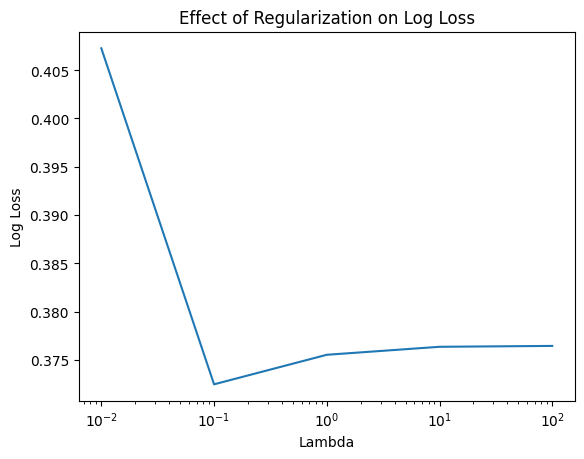

In [13]:
# lets plot it to visualize the effect of regularization
import matplotlib.pyplot as plt
log_losses = []
for lambda_val in lambda_values:
    model = LogisticRegression(C=lambda_val, max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    log_loss = - (y_test * np.log(y_pred) + (1 - y_test) * np.log(1 - y_pred)).mean()
    log_losses.append(log_loss)
plt.plot(lambda_values, log_losses)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Log Loss')
plt.title('Effect of Regularization on Log Loss')
plt.show()

In [14]:
# Hyper parameter tuning is the process of optimizing the parameters


from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# prepare dataframe
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
# split the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# create base model and note the mse 
model = KNeighborsRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Base Model MSE: {mse:.4f}")

Base Model MSE: 4500.7600


In [22]:
# lets use grid search to find the best hyper parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9,11,13,15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best Model MSE: {mse_best:.4f}")

Best Hyperparameters: {'metric': 'minkowski', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Best Model MSE: 3637.5578


In [21]:
# you can use random search as well for hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)
best_model_random = random_search.best_estimator_
print("Best Hyperparameters (Random Search):", random_search.best_params_)

y_pred_random = best_model_random.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
print(f"Best Model MSE (Random Search): {mse_random:.4f}")

Best Hyperparameters (Random Search): {'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'metric': 'minkowski'}
Best Model MSE (Random Search): 3637.5578


/Users/rahultiwari/Documents/02_Freelancing/as_ds_course/.venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 84 is smaller than n_iter=100. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [27]:
# bayesian optimization can also be used for hyper parameter tuning
# lets import install bayesian-optimization package
from skopt import BayesSearchCV
param_grid = {
    'n_neighbors': (3, 15),
    'weights': ['uniform', 'distance'],
    'p': (1, 2),
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
bayes_search = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=32, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bayes_search.fit(X_train, y_train)
best_model_bayes = bayes_search.best_estimator_
print("Best Hyperparameters (Bayesian Optimization):", bayes_search.best_params_)
y_pred_bayes = best_model_bayes.predict(X_test)
mse_bayes = mean_squared_error(y_test, y_pred_bayes)
print(f"Best Model MSE (Bayesian Optimization): {mse_bayes:.4f}")

/Users/rahultiwari/Documents/02_Freelancing/as_ds_course/.venv/lib/python3.13/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('euclidean'), np.int64(15), np.int64(2), np.str_('distance')] before, using random point ['minkowski', np.int64(11), np.int64(1), 'uniform']
  warnings.warn(
/Users/rahultiwari/Documents/02_Freelancing/as_ds_course/.venv/lib/python3.13/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('euclidean'), np.int64(12), np.int64(2), np.str_('distance')] before, using random point ['euclidean', np.int64(13), np.int64(2), 'distance']
  warnings.warn(
/Users/rahultiwari/Documents/02_Freelancing/as_ds_course/.venv/lib/python3.13/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('minkowski'), np.int64(12), np.int64(2), np.str_('distance')] before, using random point ['euclidean', np.int64(9

Best Hyperparameters (Bayesian Optimization): OrderedDict({'metric': 'euclidean', 'n_neighbors': 12, 'p': 2, 'weights': 'distance'})
Best Model MSE (Bayesian Optimization): 3789.0688


## Reference
 - https://medium.com/@aditib259/a-comprehensive-guide-to-hyperparameter-tuning-in-machine-learning-dd9bb8072d02